# Logistic Regression
used to predict the probability of a categorical dependent variable.

Assumptions- 

- Only the meaningful variables should be included.
- independent variables should be independent of each other
- independent variables are linearly related to the log odds.
- requires quite large sample sizes.


## Binary Logistic Regression

Logistic regression- the relationship between independent variables and a categorical dependant. 

In binary logistic regression,a binary dependent variable is present. Eg 1 or 2, pass or fail. 

## Ordinal logistic regression
Is used to model a relationship where the output has at least 3 groups which have an order, eg small, medium and large. 

## Nominal logistic regression
Is used to model the relationship where the output has 3 groups, with no order, eg red, blue and green

## Poisson regression
Is used where there is a count of items, events or results, where the counts are integers. If count data is skewed, linear regression may not perform well, and therfore poisson regression can be used, which is used to model how changes to an independant variable are associated with changes in the counts.

## Examples


## Binary Logistic regression

Binary logistic regression holds some assumptions- the dependent variable is binary, and the factor level 1 should represent he desired outcome. 


In [1]:

#%load imports.py
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
penguins=sns.load_dataset('penguins')
penguins=penguins.dropna()
penguins.head()
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
species              333 non-null object
island               333 non-null object
bill_length_mm       333 non-null float64
bill_depth_mm        333 non-null float64
flipper_length_mm    333 non-null float64
body_mass_g          333 non-null float64
sex                  333 non-null object
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


To change the 'sex' variable into a binary variable, we need to map the MALE entries to 0, and the FEMALE to 1, using the 'cat code' method.

In [3]:
penguins['sex_cat'] = penguins['sex'].astype('category')
d = dict(enumerate(penguins['sex_cat'].cat.categories))
print (d)
penguins['sex_cat'] = penguins['sex_cat'].cat.codes

{0: 'Female', 1: 'Male'}


In [4]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,sex_cat
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,1


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
x=penguins['body_mass_g']
y=penguins['sex_cat']
x=x.values.reshape(-1, 1)

scaler=MinMaxScaler()
x=scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
lr=LogisticRegression()
model=lr.fit(x_train, y_train)
predictions=model.predict(x_test)

In [6]:
from sklearn.metrics import classification_report, accuracy_score
conf_matrix = pd.crosstab(y_test, predictions, rownames=['actual'], colnames=['predicted'])

In [7]:
from scipy import stats
x=penguins['body_mass_g']
y=penguins['sex_cat']
stat, p = stats.shapiro((pd.concat([x,y], axis=1)))
print('p=%.3f' %p)
alpha = 0.05
print(p)

p=0.000
2.700162508900965e-29


In [8]:
print(conf_matrix)

predicted   0   1
actual           
0          18   9
1          21  19


In [9]:
print(f'accuracy: {100* accuracy_score(y_test, predictions):.2f} %')

accuracy: 55.22 %


if our data has an equal proportion of both classes (male and female) we can rely on the accuracy measure. However if not, we need to look at precison, recall and f1. 

Precision- determines the accuracy of positive predictions

Recall- determines the fraction of positive that were correctly identified

F1 score- weighted mean of precision and recall with best score of 1 and worst of 0. Ie the balance between precision and recall. An F1 of 0.6 would indicate a classification strength of 60%.

In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.46      0.67      0.55        27
           1       0.68      0.47      0.56        40

    accuracy                           0.55        67
   macro avg       0.57      0.57      0.55        67
weighted avg       0.59      0.55      0.55        67



In [11]:
# predictions on new data
new_data={'body_mass_g':[3500]}
dataframe=pd.DataFrame(new_data, columns=['body_mass_g'])
y_pred=model.predict(dataframe)
print(y_pred)


[1]


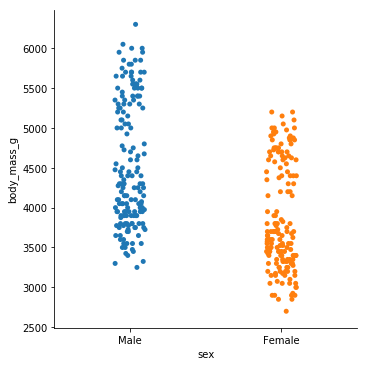

In [12]:
# based on a mass of 3500g, the sex is predicted to be female.
%matplotlib inline
sns.catplot(x='sex', y='body_mass_g', data=penguins)

In [13]:
# logistic regression with cross validation built in....

In [14]:
from sklearn.linear_model import LogisticRegressionCV

x=penguins['body_mass_g']
y=penguins['sex']
x=x.values.reshape(-1, 1)

scaler=MinMaxScaler()
x=scaler.fit_transform(x)

model_cv=LogisticRegressionCV(cv=5, random_state=0, max_iter=10000).fit(x,y)
y_pred_cv=model_cv.predict(dataframe)
print(y_pred_cv)
print(f'accuracy: {100* model_cv.score(x,y):.2f} %')

['Male']
accuracy: 67.57 %


##  ordinal Logistic regression
makes use of the mord library, with the LogisticAT() function, which is a Classifier that implements the ordinal logistic model.

In [15]:

import mord

In [16]:
# ordinal dataset
data=pd.read_stata(("https://stats.idre.ucla.edu/stat/data/ologit.dta"))
data.head()

,apply,pared,public,gpa
0,very likely,0,0,3.26
1,somewhat likely,1,0,3.21
2,unlikely,1,1,3.94
3,somewhat likely,0,0,2.81
4,somewhat likely,0,0,2.53


In [17]:
data['apply'].value_counts()

unlikely           220
somewhat likely    140
very likely         40
Name: apply, dtype: int64

In [18]:
data['apply_cat']=data['apply'].astype('category')
d = dict(enumerate(data['apply_cat'].cat.categories))
print (d)
data['apply_cat'] = data['apply_cat'].cat.codes

{0: 'unlikely', 1: 'somewhat likely', 2: 'very likely'}


In [19]:
x=data['gpa']
y=data['apply_cat']

x=x.values.reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [20]:
model_ordinal = mord.LogisticAT(alpha=1.0).fit(x_train, y_train)
# where alpha=0 is no regulisation, default of 1.0
y_pred_ordinal=model_ordinal.predict(x_test)

print(f'accuracy: {100* accuracy_score(y_test, y_pred_ordinal):.2f} %')

accuracy: 52.50 %
